In [1]:
import pandas as pd

# Load the data
file_path = "linear_regression.csv"
data = pd.read_csv(file_path)

# Explore the dataset
print(data.head())
print(data.info())

   hba1c_next_value patient_id encounter_id   enc_date race_ethnicity sex  \
0               7.0      #ADUC       CxmFhR  1/24/2023          Asian   F   
1               6.2      #AIHB       CBBwyH  2/22/2023          Black   F   
2               6.2      #AIHB       CRBwyH   3/6/2023          Black   F   
3               5.5       #AJT       CBw8XE   8/1/2023          White   M   
4               5.5       #AJT       Chw8XE   8/8/2023          White   M   

  marital_status  year_of_birth patient_regional_location  hba1c_last_value  \
0        Married         1992.0                   Midwest               7.1   
1         Single         1969.0                   Midwest               7.1   
2         Single         1969.0                   Midwest               7.1   
3        Married         1992.0                   Midwest              11.5   
4        Married         1992.0                   Midwest              11.5   

   ...  Added_Med_MET  Added_Med_SUL  Added_Med_SGLT2  Added_M

In [2]:
# Fill missing values with the median of the column
data['year_of_birth'].fillna(data['year_of_birth'].median(), inplace=True)

In [3]:
print(data.isnull().sum())

hba1c_next_value             0
patient_id                   0
encounter_id                 0
enc_date                     0
race_ethnicity               0
sex                          0
marital_status               0
year_of_birth                0
patient_regional_location    0
hba1c_last_value             0
diabetes_duration_2023       0
Last_Med_MET                 0
Last_Med_SUL                 0
Last_Med_SGLT2               0
Last_Med_Insulin             0
Last_Med_AlphaGI             0
Last_Med_DPP4                0
Last_Med_GLP1                0
Last_Med_GIP_GLP1            0
Last_Med_TZD                 0
last_combined_meds           0
added_combined_meds          0
Added_Med_MET                0
Added_Med_SUL                0
Added_Med_SGLT2              0
Added_Med_Insulin            0
Added_Med_AlphaGI            0
Added_Med_DPP4               0
Added_Med_GLP1               0
Added_Med_GIP_GLP1           0
Added_Med_TZD                0
Added_Nothing                0
dtype: i

In [4]:
print(data.columns)

Index(['hba1c_next_value', 'patient_id', 'encounter_id', 'enc_date',
       'race_ethnicity', 'sex', 'marital_status', 'year_of_birth',
       'patient_regional_location', 'hba1c_last_value',
       'diabetes_duration_2023', 'Last_Med_MET', 'Last_Med_SUL',
       'Last_Med_SGLT2', 'Last_Med_Insulin', 'Last_Med_AlphaGI',
       'Last_Med_DPP4', 'Last_Med_GLP1', 'Last_Med_GIP_GLP1', 'Last_Med_TZD',
       'last_combined_meds', 'added_combined_meds', 'Added_Med_MET',
       'Added_Med_SUL', 'Added_Med_SGLT2', 'Added_Med_Insulin',
       'Added_Med_AlphaGI', 'Added_Med_DPP4', 'Added_Med_GLP1',
       'Added_Med_GIP_GLP1', 'Added_Med_TZD', 'Added_Nothing'],
      dtype='object')


In [5]:
data = data.drop(columns=['race_ethnicity', 'sex', 'marital_status'], errors='ignore')

In [6]:
print(data.head())  # Check the first few rows of the DataFrame
print(data.columns)  # Verify all the columns in the DataFrame

   hba1c_next_value patient_id encounter_id   enc_date  year_of_birth  \
0               7.0      #ADUC       CxmFhR  1/24/2023         1992.0   
1               6.2      #AIHB       CBBwyH  2/22/2023         1969.0   
2               6.2      #AIHB       CRBwyH   3/6/2023         1969.0   
3               5.5       #AJT       CBw8XE   8/1/2023         1992.0   
4               5.5       #AJT       Chw8XE   8/8/2023         1992.0   

  patient_regional_location  hba1c_last_value  diabetes_duration_2023  \
0                   Midwest               7.1                1.182752   
1                   Midwest               7.1                3.039014   
2                   Midwest               7.1                3.039014   
3                   Midwest              11.5                0.416153   
4                   Midwest              11.5                0.416153   

   Last_Med_MET  Last_Med_SUL  ...  Added_Med_MET  Added_Med_SUL  \
0             1             0  ...              0     

In [7]:
print(data.dtypes)

hba1c_next_value             float64
patient_id                    object
encounter_id                  object
enc_date                      object
year_of_birth                float64
patient_regional_location     object
hba1c_last_value             float64
diabetes_duration_2023       float64
Last_Med_MET                   int64
Last_Med_SUL                   int64
Last_Med_SGLT2                 int64
Last_Med_Insulin               int64
Last_Med_AlphaGI               int64
Last_Med_DPP4                  int64
Last_Med_GLP1                  int64
Last_Med_GIP_GLP1              int64
Last_Med_TZD                   int64
last_combined_meds            object
added_combined_meds           object
Added_Med_MET                  int64
Added_Med_SUL                  int64
Added_Med_SGLT2                int64
Added_Med_Insulin              int64
Added_Med_AlphaGI              int64
Added_Med_DPP4                 int64
Added_Med_GLP1                 int64
Added_Med_GIP_GLP1             int64
A

In [8]:
data['enc_date'] = pd.to_datetime(data['enc_date'], errors='coerce')

In [9]:
categorical_cols = ['patient_id', 'encounter_id', 'patient_regional_location']
data[categorical_cols] = data[categorical_cols].astype('category')

In [10]:
print(data.isnull().sum())

hba1c_next_value             0
patient_id                   0
encounter_id                 0
enc_date                     0
year_of_birth                0
patient_regional_location    0
hba1c_last_value             0
diabetes_duration_2023       0
Last_Med_MET                 0
Last_Med_SUL                 0
Last_Med_SGLT2               0
Last_Med_Insulin             0
Last_Med_AlphaGI             0
Last_Med_DPP4                0
Last_Med_GLP1                0
Last_Med_GIP_GLP1            0
Last_Med_TZD                 0
last_combined_meds           0
added_combined_meds          0
Added_Med_MET                0
Added_Med_SUL                0
Added_Med_SGLT2              0
Added_Med_Insulin            0
Added_Med_AlphaGI            0
Added_Med_DPP4               0
Added_Med_GLP1               0
Added_Med_GIP_GLP1           0
Added_Med_TZD                0
Added_Nothing                0
dtype: int64


In [11]:
data['age'] = 2024 - data['year_of_birth']

In [12]:
data['enc_year'] = data['enc_date'].dt.year
data['enc_month'] = data['enc_date'].dt.month
data['enc_day_of_week'] = data['enc_date'].dt.dayofweek

In [13]:
data = pd.get_dummies(data, columns=['patient_regional_location'])

In [14]:
print(data.columns)

Index(['hba1c_next_value', 'patient_id', 'encounter_id', 'enc_date',
       'year_of_birth', 'hba1c_last_value', 'diabetes_duration_2023',
       'Last_Med_MET', 'Last_Med_SUL', 'Last_Med_SGLT2', 'Last_Med_Insulin',
       'Last_Med_AlphaGI', 'Last_Med_DPP4', 'Last_Med_GLP1',
       'Last_Med_GIP_GLP1', 'Last_Med_TZD', 'last_combined_meds',
       'added_combined_meds', 'Added_Med_MET', 'Added_Med_SUL',
       'Added_Med_SGLT2', 'Added_Med_Insulin', 'Added_Med_AlphaGI',
       'Added_Med_DPP4', 'Added_Med_GLP1', 'Added_Med_GIP_GLP1',
       'Added_Med_TZD', 'Added_Nothing', 'age', 'enc_year', 'enc_month',
       'enc_day_of_week', 'patient_regional_location_Midwest',
       'patient_regional_location_Northeast',
       'patient_regional_location_South', 'patient_regional_location_West'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply LabelEncoder to a specific column (e.g., 'patient_regional_location_Midwest')
data['patient_regional_location_Midwest'] = encoder.fit_transform(data['patient_regional_location_Midwest'])

In [16]:
# Combine the one-hot encoded region columns into a single column
data['patient_regional_location'] = data[['patient_regional_location_Midwest', 
                                           'patient_regional_location_Northeast', 
                                           'patient_regional_location_South', 
                                           'patient_regional_location_West']].idxmax(axis=1)

# Now you can apply LabelEncoder to the combined column
encoder = LabelEncoder()
data['patient_regional_location'] = encoder.fit_transform(data['patient_regional_location'])


In [17]:
# Combine the one-hot encoded region columns into a single column
data['patient_regional_location'] = data[['patient_regional_location_Midwest', 
                                           'patient_regional_location_Northeast', 
                                           'patient_regional_location_South', 
                                           'patient_regional_location_West']].idxmax(axis=1)

# Display the first few rows to verify the new column
print(data[['patient_regional_location', 'patient_regional_location_Midwest', 
            'patient_regional_location_Northeast', 'patient_regional_location_South', 
            'patient_regional_location_West']].head())


           patient_regional_location  patient_regional_location_Midwest  \
0  patient_regional_location_Midwest                                  1   
1  patient_regional_location_Midwest                                  1   
2  patient_regional_location_Midwest                                  1   
3  patient_regional_location_Midwest                                  1   
4  patient_regional_location_Midwest                                  1   

   patient_regional_location_Northeast  patient_regional_location_South  \
0                                False                            False   
1                                False                            False   
2                                False                            False   
3                                False                            False   
4                                False                            False   

   patient_regional_location_West  
0                           False  
1                         

In [18]:
# Check if any of the columns have non-zero values
print(data[['patient_regional_location_Midwest', 
            'patient_regional_location_Northeast', 
            'patient_regional_location_South', 
            'patient_regional_location_West']].sum())


patient_regional_location_Midwest      16937
patient_regional_location_Northeast    13539
patient_regional_location_South        22361
patient_regional_location_West         17837
dtype: int64


In [19]:
# Display a few rows to see what they look like
print(data[['patient_regional_location_Midwest', 
            'patient_regional_location_Northeast', 
            'patient_regional_location_South', 
            'patient_regional_location_West']].head(10))

   patient_regional_location_Midwest  patient_regional_location_Northeast  \
0                                  1                                False   
1                                  1                                False   
2                                  1                                False   
3                                  1                                False   
4                                  1                                False   
5                                  1                                False   
6                                  1                                False   
7                                  1                                False   
8                                  1                                False   
9                                  1                                False   

   patient_regional_location_South  patient_regional_location_West  
0                            False                           False  
1             

In [20]:
# Check the output of idxmax for a specific row
print(data[['patient_regional_location_Midwest', 
            'patient_regional_location_Northeast', 
            'patient_regional_location_South', 
            'patient_regional_location_West']].iloc[0])
print(data[['patient_regional_location_Midwest', 
            'patient_regional_location_Northeast', 
            'patient_regional_location_South', 
            'patient_regional_location_West']].iloc[0].idxmax())


patient_regional_location_Midwest          1
patient_regional_location_Northeast    False
patient_regional_location_South        False
patient_regional_location_West         False
Name: 0, dtype: object
patient_regional_location_Midwest


In [21]:
# Create a new column 'patient_regional_location' with the region name based on the one-hot encoded columns
region_columns = [
    'patient_regional_location_Midwest',
    'patient_regional_location_Northeast',
    'patient_regional_location_South',
    'patient_regional_location_West'
]

# Use idxmax() to find the column with the highest value (which will be the region with the 1)
data['patient_regional_location'] = data[region_columns].idxmax(axis=1)

# Check the result
print(data[['patient_regional_location']].head())

           patient_regional_location
0  patient_regional_location_Midwest
1  patient_regional_location_Midwest
2  patient_regional_location_Midwest
3  patient_regional_location_Midwest
4  patient_regional_location_Midwest


In [22]:
# Create a new column with only the region names
data['patient_regional_location'] = data['patient_regional_location'].str.replace('patient_regional_location_', '', regex=False)

# Check the result
print(data[['patient_regional_location']].head())

  patient_regional_location
0                   Midwest
1                   Midwest
2                   Midwest
3                   Midwest
4                   Midwest


In [23]:
print(data['patient_regional_location'].unique())

['Midwest' 'South' 'Northeast' 'West']


In [24]:
# Check the mapping used during LabelEncoder fitting
encoder.classes_

array(['patient_regional_location_Midwest',
       'patient_regional_location_Northeast',
       'patient_regional_location_South',
       'patient_regional_location_West'], dtype=object)

In [25]:
# Create a mapping from the integer codes to the region names
label_mapping = {0: 'Midwest', 1: 'Northeast', 2: 'South', 3: 'West'}

# Replace integer codes in the column with the corresponding region names
data['patient_regional_location'] = data['patient_regional_location'].map(label_mapping)


In [26]:
print(data['patient_regional_location'].unique())

[nan]


In [27]:
!!Feature Engineering

["'Feature' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [28]:
from sklearn.model_selection import train_test_split

# Replace 'hba1c_next_value' with the actual target column if it's different
X = data.drop('hba1c_next_value', axis=1)  # Features
y = data['hba1c_next_value']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(X_train.dtypes)

patient_id                                   category
encounter_id                                 category
enc_date                               datetime64[ns]
year_of_birth                                 float64
hba1c_last_value                              float64
diabetes_duration_2023                        float64
Last_Med_MET                                    int64
Last_Med_SUL                                    int64
Last_Med_SGLT2                                  int64
Last_Med_Insulin                                int64
Last_Med_AlphaGI                                int64
Last_Med_DPP4                                   int64
Last_Med_GLP1                                   int64
Last_Med_GIP_GLP1                               int64
Last_Med_TZD                                    int64
last_combined_meds                             object
added_combined_meds                            object
Added_Med_MET                                   int64
Added_Med_SUL               

In [30]:
X_train = pd.get_dummies(X_train, drop_first=True)  # drop_first=True to avoid dummy variable trap

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])


In [32]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data
file_path = "linear_regression.csv"
data = pd.read_csv(file_path)

# Step 3: Drop unnecessary columns (e.g., non-predictive columns like IDs)
data = data.drop(columns=['patient_id', 'encounter_id', 'enc_date'])

# Step 4: Handle missing values
data['year_of_birth'].fillna(data['year_of_birth'].median(), inplace=True)

# Step 5: Define features and target variable
X = data.drop(columns=['hba1c_next_value'])
y = data['hba1c_next_value']

# Step 6: Preprocess categorical and numerical features
categorical_features = ['race_ethnicity', 'sex', 'marital_status', 'patient_regional_location']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# One-hot encoding for categorical features
# Standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create a pipeline with preprocessor and linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Step 9: Train the model
pipeline.fit(X_train, y_train)

# Step 10: Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.59
R^2 Score: 0.24


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample data (replace with your actual dataset)
import numpy as np
X = np.random.rand(100, 5)  # Feature matrix (100 samples, 5 features)
y = np.random.randint(0, 2, 100)  # Labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the model: RandomForest or SVM
classifier = 1  # Set to 1 for SVM, 2 for RandomForest

if classifier == 1:
    # **SVM Classifier**
    print("SVM Classifier Selected")

    # Scaling the data for SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the SVM model
    svm = SVC()

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Print best parameters and the best score
    print("Best parameters for SVM:", grid_search.best_params_)
    print("Best cross-validated score for SVM:", grid_search.best_score_)

    # Make predictions and evaluate
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)
    print("Test accuracy for SVM:", accuracy_score(y_test, y_pred))

elif classifier == 2:
    # **RandomForest Classifier**
    print("RandomForest Classifier Selected")

    # Define the RandomForest model
    rf = RandomForestClassifier(random_state=42)

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print best parameters and the best score
    print("Best parameters for RandomForest:", grid_search.best_params_)
    print("Best cross-validated score for RandomForest:", grid_search.best_score_)

    # Make predictions and evaluate
    y_pred = grid_search.best_estimator_.predict(X_test)
    print("Test accuracy for RandomForest:", accuracy_score(y_test, y_pred))

else:
    print("Invalid classifier selection. Please choose 1 for SVM or 2 for RandomForest.")


SVM Classifier Selected
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated score for SVM: 0.525
Test accuracy for SVM: 0.7


In [34]:
# Use a larger range and additional options for hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight': ['balanced', None]  # Adjust if you have an imbalanced dataset
}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print updated results
print("Best parameters for SVM:", grid_search.best_params_)
print("Best cross-validated score for SVM:", grid_search.best_score_)

Best parameters for SVM: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validated score for SVM: 0.575


In [35]:
# Try running a similar tuning with RandomForest if not already done
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best cross-validated score for RandomForest:", grid_search_rf.best_score_)

NameError: name 'rf' is not defined

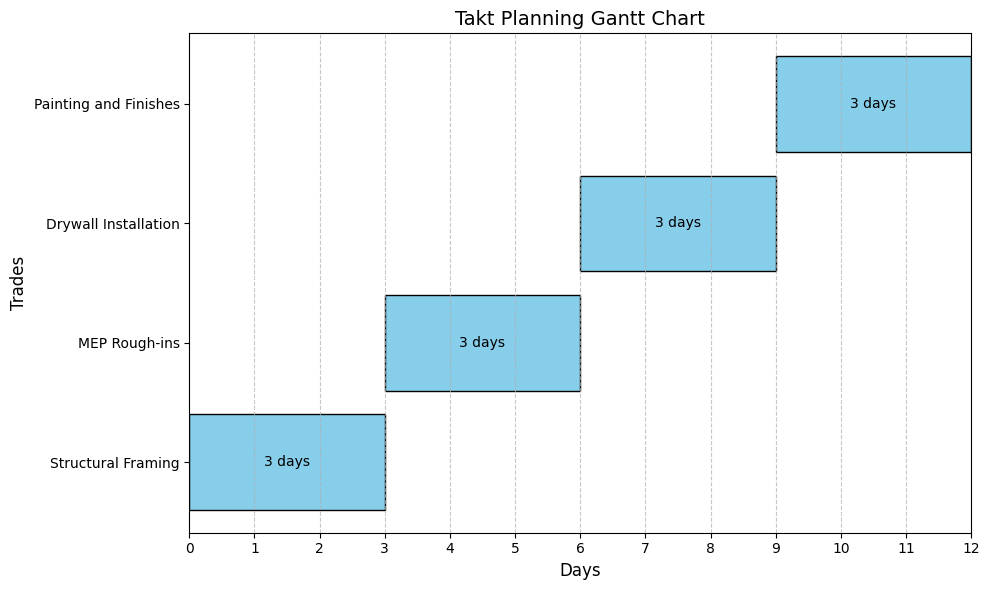

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Takt Planning Table
data = {
    'Takt Phase': ['1', '2', '3', '4'],
    'Trade': ['Structural Framing', 'MEP Rough-ins', 'Drywall Installation', 'Painting and Finishes'],
    'Start Day': [0, 3, 6, 9],  # Each phase starts after the previous ends
    'Duration (Days)': [3, 3, 3, 3]  # Days per zone
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate End Day
df['End Day'] = df['Start Day'] + df['Duration (Days)']

# Plotting the Gantt Chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df.iterrows():
    ax.barh(row['Trade'], row['Duration (Days)'], left=row['Start Day'], color='skyblue', edgecolor='black')
    ax.text(row['Start Day'] + row['Duration (Days)']/2, i, f"{row['Duration (Days)']} days", 
            ha='center', va='center', color='black', fontsize=10)

# Customize the chart
ax.set_title('Takt Planning Gantt Chart', fontsize=14)
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('Trades', fontsize=12)
ax.set_xticks(range(0, 13, 1))
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_xlim(0, 12)
plt.tight_layout()

# Show the chart
plt.show()

In [46]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\rafif\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [47]:
pip show tabulate

Name: tabulate
Version: 0.9.0
Summary: Pretty-print tabular data
Home-page: 
Author: 
Author-email: Sergey Astanin <s.astanin@gmail.com>
License: MIT
Location: C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [48]:
from tabulate import tabulate

# Data for Takt Planning Table
data = [
    ["1", "3", "Structural Framing", "Construction of the structural framework, including beams, columns, and walls."],
    ["2", "3", "MEP Rough-ins", "Installation of mechanical, electrical, and plumbing systems, preparing for inspections."],
    ["3", "3", "Drywall Installation", "Installing drywall sheets and preparing surfaces for finishing."],
    ["4", "3", "Painting and Finishes", "Application of paint, installation of trims, and final quality checks."]
]

# Table headers
headers = ["Takt Phase", "Days per Zone", "Trade", "Scope of Work"]

# Generate table
table = tabulate(data, headers=headers, tablefmt="grid")

# Print the table
print(table)

+--------------+-----------------+-----------------------+------------------------------------------------------------------------------------------+
|   Takt Phase |   Days per Zone | Trade                 | Scope of Work                                                                            |
+==============+=================+=======================+==========================================================================================+
|            1 |               3 | Structural Framing    | Construction of the structural framework, including beams, columns, and walls.           |
+--------------+-----------------+-----------------------+------------------------------------------------------------------------------------------+
|            2 |               3 | MEP Rough-ins         | Installation of mechanical, electrical, and plumbing systems, preparing for inspections. |
+--------------+-----------------+-----------------------+------------------------------------------